## 1 - Summary Statistics

In [9]:
import pandas as pd 
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# columns: date, SPY ret, TB1M ret
data = pd.read_excel('barnstable_analysis_data.xlsx',sheet_name='data')
data['date'] = pd.to_datetime(data['date'])
data_65_99 = data[(data['date'] >= '1965-01-01') & (data['date'] <= '1999-12-31')]
data_00 = data[(data['date'] >= '2000-01-01') & (data['date'] <= '2024-12-31')]
data_26 = data[(data['date'] >= '1926-01-01') & (data['date'] <= '2024-12-31')]
data_65_24 = data[(data['date'] >= '1965-01-01')]

In [10]:
## Summary Statistics 
# r^m => market return, r^f => risk free rate, r~ => excess returns

def ret_calc(df): 
    out = df.copy()

    # df creation
    out['r_m'] = out['SPX']
    mm,vm = 12 * out['r_m'].mean(), (12)**.5 * out['r_m'].std()
    out['r_f'] = out['TB1M']
    mf,vf = 12 * out['r_f'].mean(), (12)**.5 * out['r_f'].std()
    out['xs'] = out['r_m'] - out['r_f']
    mxs,vxs = 12 *  out['xs'].mean(), (12)**.5 * out['xs'].std()
    out['lr_m'] = np.log(1 + out['SPX'])
    lmm,lvm = 12 * out['lr_m'].mean(), (12)**.5 *  out['lr_m'].std()
    out['lr_f'] = np.log(1 + out['TB1M'])
    lmf,lvf = 12 * out['lr_f'].mean(), (12)**.5 * out['lr_f'].std()   
    out['lxs'] = out['lr_m'] - out['lr_f']
    lmxs,lvxs = 12 * out['lxs'].mean(), (12)**.5 * out['lxs'].std()

    stats = [mm,mf,mxs,lmm,lmf,lmxs,vm,vf,vxs,lvm,lvf,lvxs]
    return stats,out

# 1926-2024
stats_26,frame_26 = ret_calc(data_26)

# 2000-2024
stats_00,frame_00 = ret_calc(data_00)

# 1965-1999
stats_65_99,frame_65_99 = ret_calc(data_65_99)

# df creation
results = pd.DataFrame()
results['1965-1999 Mean'] = stats_65_99[0:6]
results['1965-1999 Vol'] = stats_65_99[6:]
results['2000-2024 Mean'] = stats_65_99[0:6]
results['2000-2024 Vol'] = stats_65_99[6:]
results['1926-2024 Mean'] = stats_65_99[0:6]
results['1926-2024 Vol'] = stats_65_99[6:12]
results.index = ['Real','Risk Free','Excess','Log Real','Log Risk Free', 'Log Excess']
display(results.round(4))

,1965-1999 Mean,1965-1999 Vol,2000-2024 Mean,2000-2024 Vol,1926-2024 Mean,1926-2024 Vol
Real,0.1294,0.1494,0.1294,0.1494,0.1294,0.1494
Risk Free,0.0615,0.0072,0.0615,0.0072,0.0615,0.0072
Excess,0.0687,0.1502,0.0687,0.1502,0.0687,0.1502
Log Real,0.1176,0.1496,0.1176,0.1496,0.1176,0.1496
Log Risk Free,0.0613,0.0071,0.0613,0.0071,0.0613,0.0071
Log Excess,0.0571,0.1504,0.0571,0.1504,0.0571,0.1504


## 2 - Probability of Underperformance
Want CDF(-sqrt(n) * sharpe)

'Probability of Underperformce (65-99): 0.0124'

'Probability of Underperformce (15y): 0.0708'

'Probability of Underperformce (30y): 0.0188'

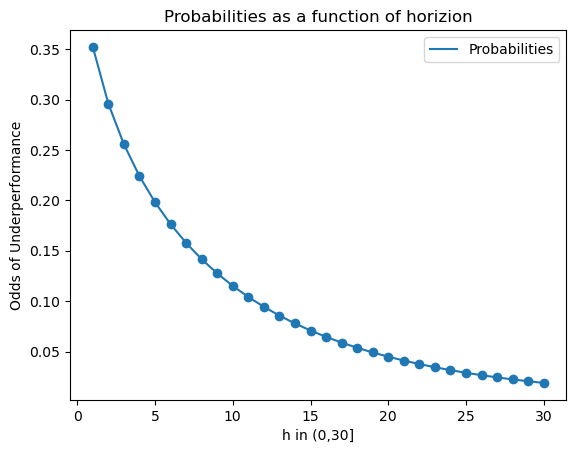

In [11]:
## 2.1 P[Underperformance from 65-99]

def calc_underperf_p(sharpe,time):
    return norm.cdf(-np.sqrt(time) * sharpe)

# 1965-1999 Subsample 
sharpe = results.iloc[5,0]/results.iloc[5,1]
p1 = calc_underperf_p(sharpe,35)
display('Probability of Underperformce (65-99): {}'.format(p1.round(4)))

# H = 15
p2 = calc_underperf_p(sharpe,15)
display('Probability of Underperformce (15y): {}'.format(p2.round(4)))

# H = 30
p3 = calc_underperf_p(sharpe,30)
display('Probability of Underperformce (30y): {}'.format(p3.round(4)))

# Plot probability wrt investment horizion h 
probs = []

for i in range(1,31):
    p = calc_underperf_p(sharpe,i)
    probs.append(p)

plt.figure(1)
plt.plot([i for i in range(1,31)],probs, label = 'Probabilities')
plt.scatter([i for i in range(1,31)],probs)
plt.legend()
plt.xlabel('h in (0,30]')
plt.ylabel('Odds of Underperformance')
plt.title('Probabilities as a function of horizion')
plt.show()


## 3 - Full Sample Analysis
Use sample 1965 - 2024 to reconsider and plot probability of 30y horizion

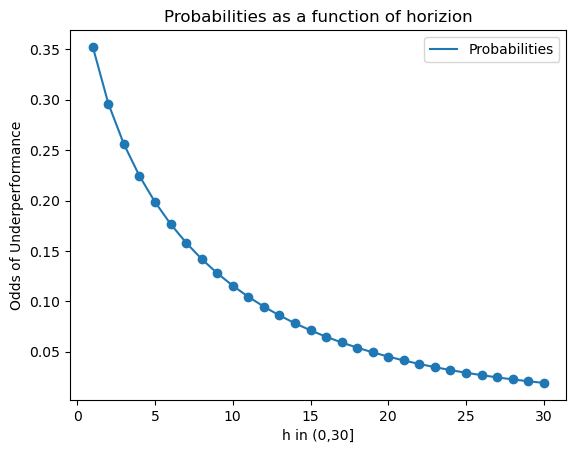

In [ ]:
stats, frame = ret_calc(data_65_24)
sharpe_2 = stats[5]/stats[11]

# Solving for probabilities & plotting
probs2 = []

for i in range(1,31):
    p = calc_underperf_p(sharpe_2,i)
    probs2.append(p)

plt.figure(2)
plt.plot([i for i in range(1,31)],probs2, label = 'Probabilities')
plt.scatter([i for i in range(1,31)],probs2)
plt.legend()
plt.xlabel('h in (0,30]')
plt.ylabel('Odds of Underperformance')
plt.title('Probabilities as a function of horizion')
plt.show()

## In-Sample Estimate of Out-of-Sample Likelihood
Probability (based on 1999 estimate of mu) that the h-year market return would be smaller than realized in 2000-2024?

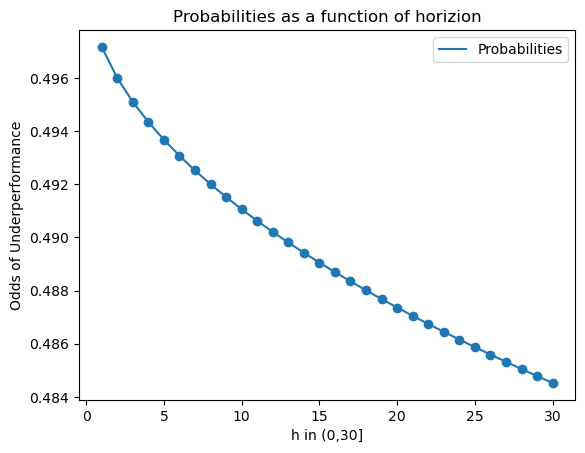

In [14]:
stats, frame = ret_calc(data_65_99)
stats2, frame2 = ret_calc(data_00)
#stats = [mm,mf,mxs,lmm,lmf,lmxs,vm,vf,vxs,lvm,lvf,lvxs]

r_xs_oos = stats2[5]
r_xs_is = stats[5]
v_xs_is = stats[11]
zsc = (r_xs_oos - r_xs_is)/v_xs_is
probs3 = []

for i in range(1,31):
    p = calc_underperf_p(zsc,i)
    probs3.append(p)

plt.figure(3)
plt.plot([i for i in range(1,31)],probs3, label = 'Probabilities')
plt.scatter([i for i in range(1,31)],probs3)
plt.legend()
plt.xlabel('h in (0,30]')
plt.ylabel('Odds of Underperformance')
plt.title('Probabilities as a function of horizion')
plt.show()

